In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

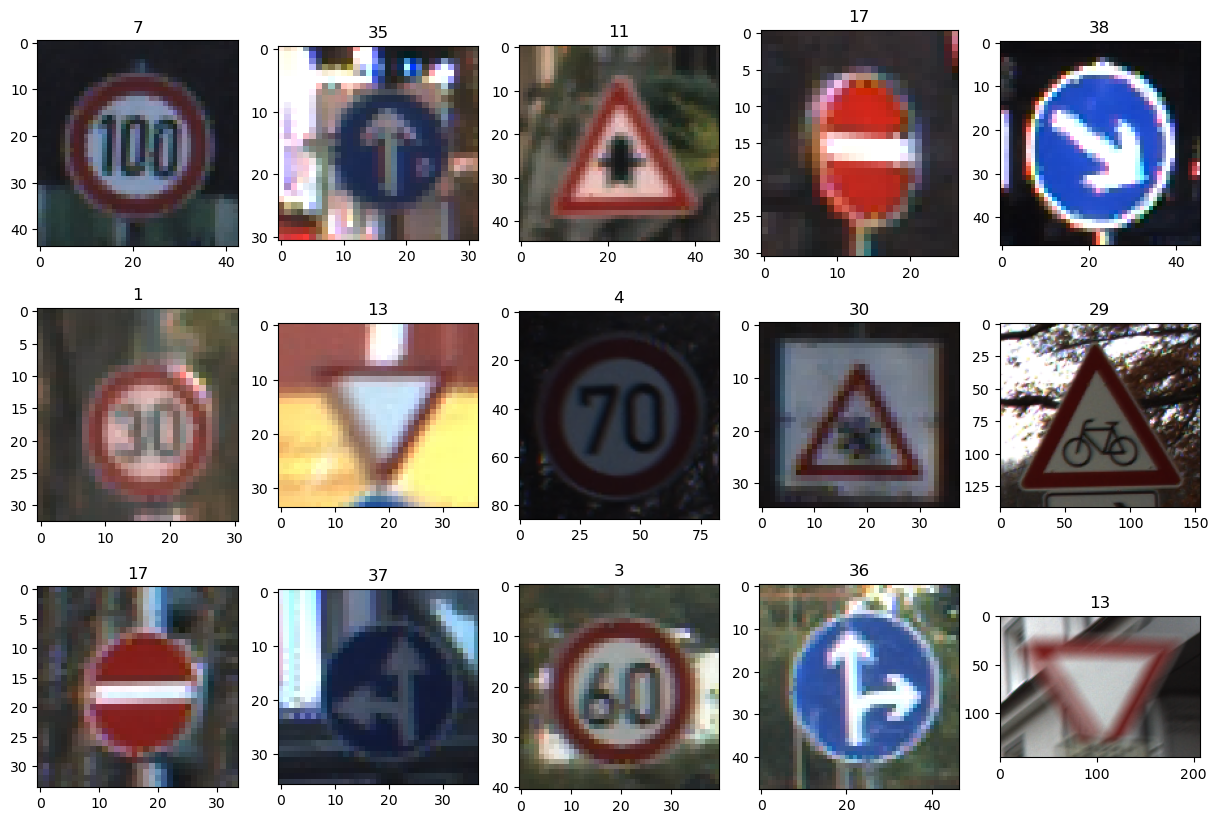

In [2]:
# Load the training labels
root = 'Data' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    classId = data.iloc[idx]['ClassId']
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(classId)


In [3]:
#max ID test
def maxID():
    maxId = 0
    for ii in range(num_samples):
        classId = data.iloc[ii]['ClassId']
        if maxId < classId :
            maxId = classId
    print(maxId)
    
#maxID()
#42

(Text(0.5, 0, 'Class ID'), Text(0, 0.5, 'counts'))

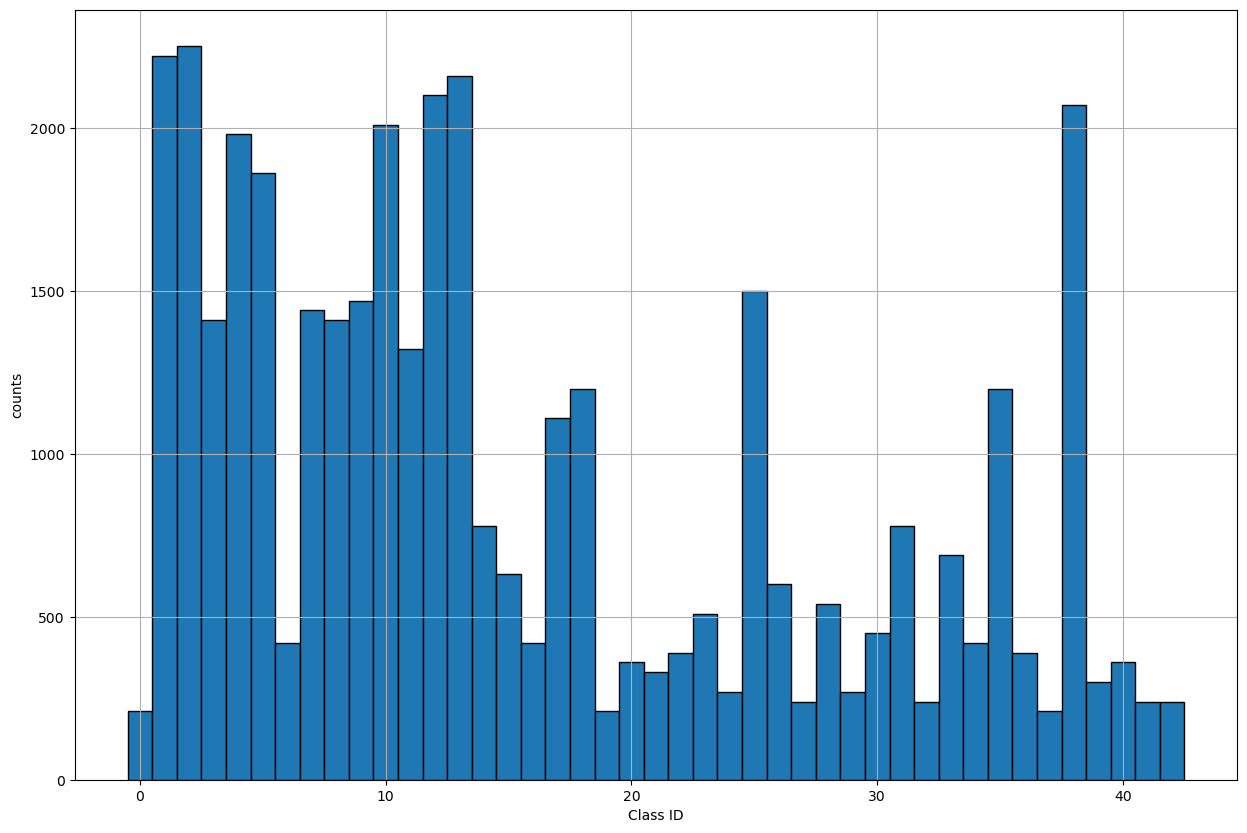

In [4]:
centers = np.arange(0, 44)

histData = data['ClassId']

plt.grid(True)
plt.hist(histData, bins = centers -0.5, edgecolor = 'black')
plt.xlabel('Class ID'), plt.ylabel('counts')

<h2>Questions</h2>
<b>1. Do you consider the dataset to be balanced? If so, why? If not, why?</b><br>
<i>I think it is unbalanced because we have big difference of amount samples of different types of traffic signs. And it seems like unbalanced dataset is very common issue because we have different freequency of samples in real life. But neural network have to recognize all this samples with euqally high probability</i><br><br>

<b>2. Are there any classes that are (significantly) over-represented or under-represeneted?</b>
<i>Yes. We can easely see on diagram that some classes has about 200 samples and others >2000. what 10 times bigger! I heard on lection that exists databases with millions of samples, so I can suggest that all classes that less than 2000*0.9 are under-represeneted. So those which have about 200 samples are significantly under-represeneted</i>

==================================================================================================================

Optional<br>
Perform a further analysis on the dataset and draw some conclusion from it.<br>
Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?

(Text(0.5, 0, 'Sizes'), Text(0, 0.5, 'counts'))

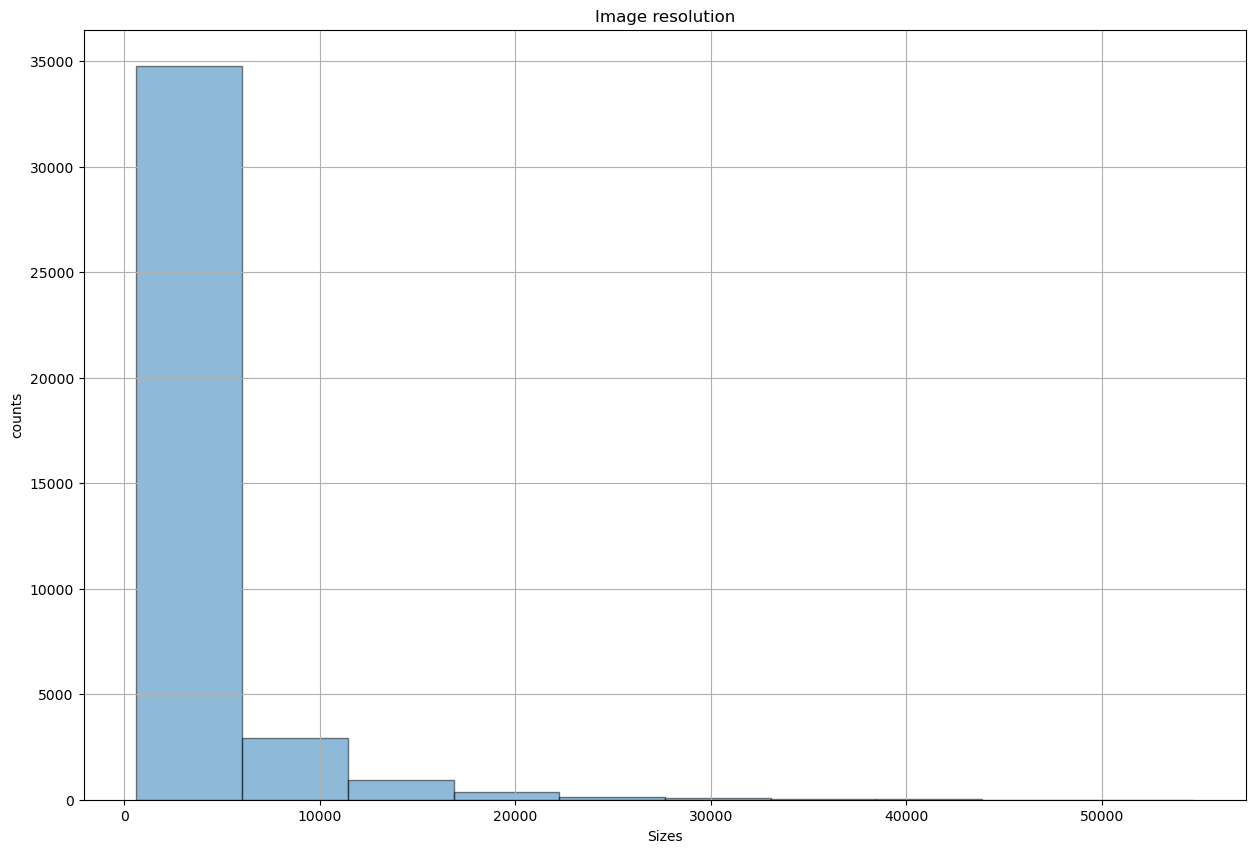

In [42]:
#image resolutions
widthData = data['Width']
heightData = data['Height']

plt.hist(widthData*heightData, bins = 10, edgecolor = 'black', alpha = 0.5, label='resoultion')

plt.title('Image resolution')
plt.grid(True)
plt.xlabel('Sizes'), plt.ylabel('counts')

(Text(0.5, 0, 'Sizes'), Text(0, 0.5, 'counts'))

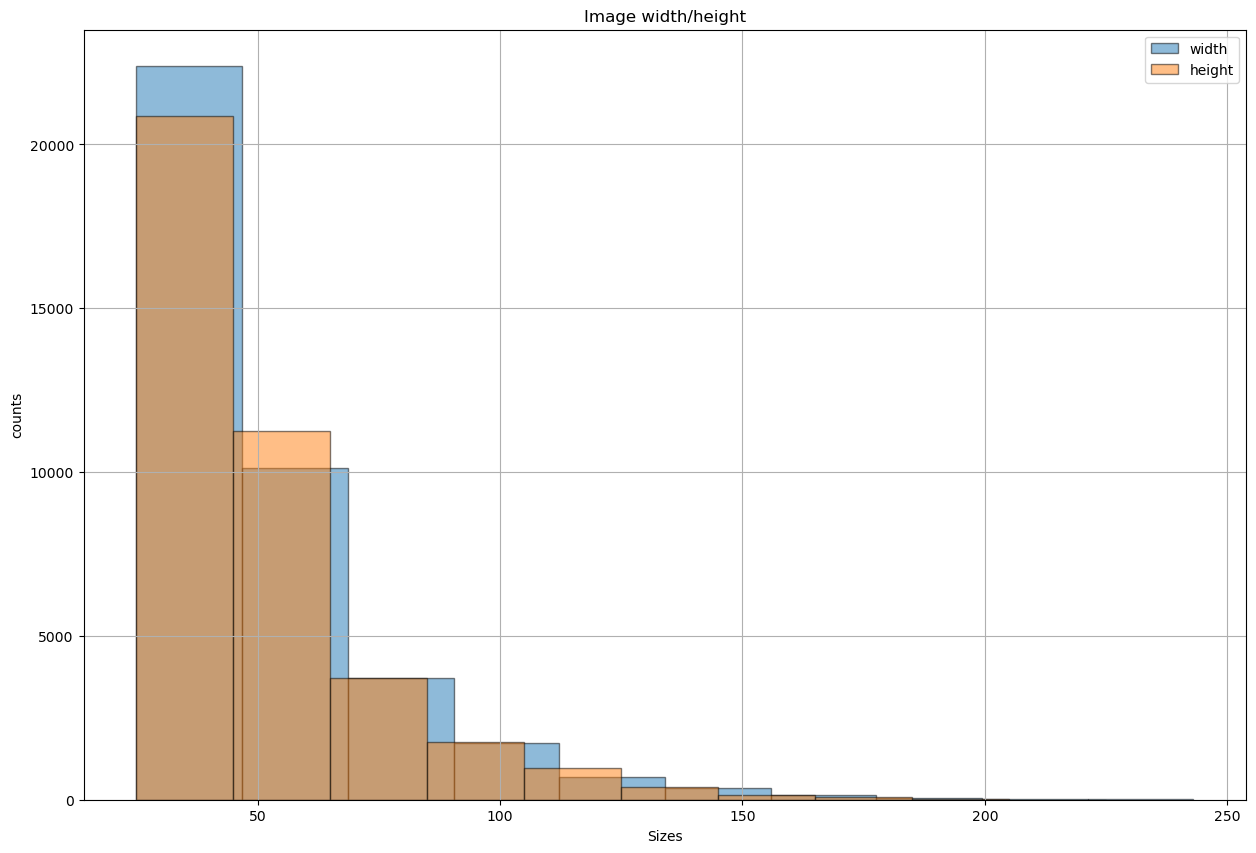

In [46]:
#images height and width
widthData = data['Width']
heightData = data['Height']

plt.hist(widthData, bins = 10, edgecolor = 'black', alpha = 0.5, label='width')
plt.hist(heightData, bins = 10, edgecolor = 'black', alpha = 0.5, label='height')

plt.legend()
plt.title('Image width/height')
plt.grid(True)
plt.xlabel('Sizes'), plt.ylabel('counts')

(Text(0.5, 0, 'Sizes'), Text(0, 0.5, 'counts'))

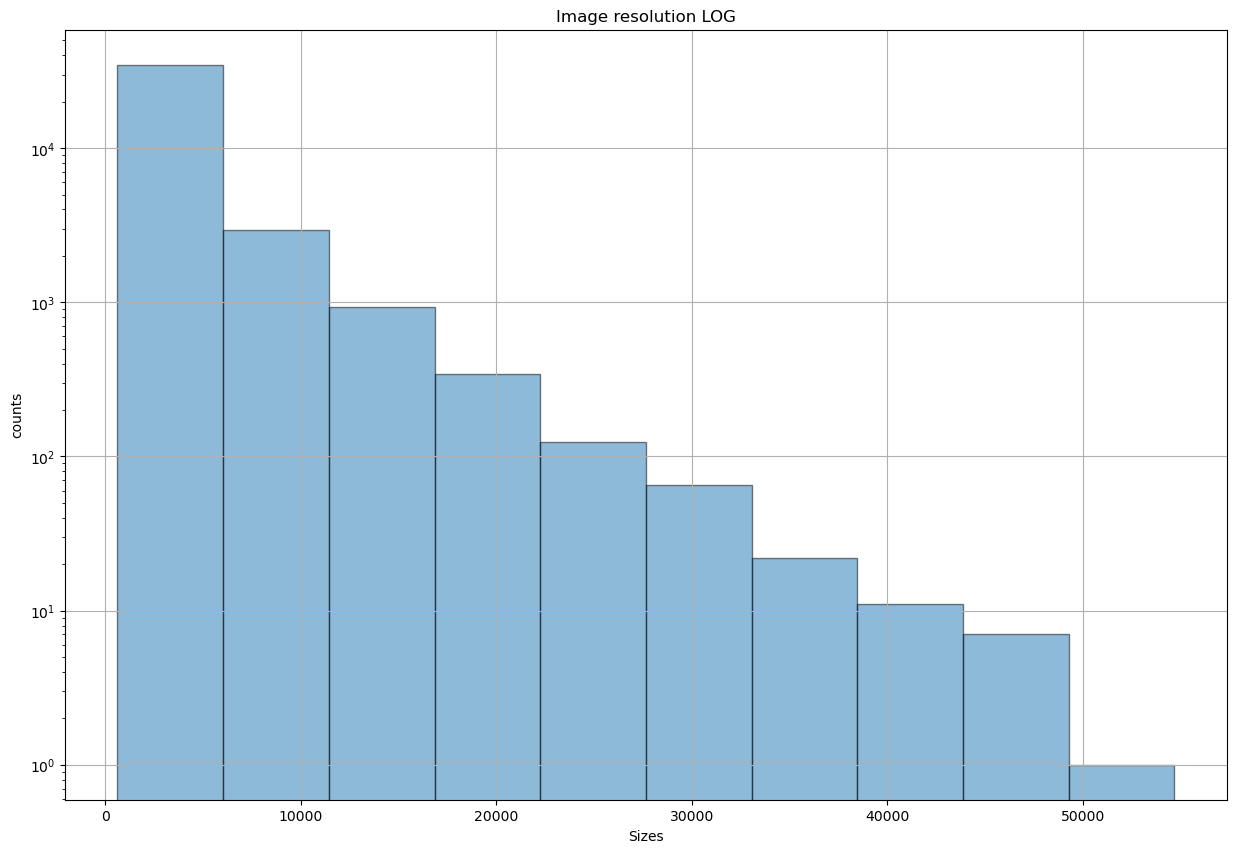

In [44]:
plt.hist(widthData*heightData, bins = 10, edgecolor = 'black', alpha = 0.5, label='resoultion', log=True)
plt.title('Image resolution LOG')
plt.grid(True)
plt.xlabel('Sizes'), plt.ylabel('counts')

As I understood this database made from video sequences. Considering this we can explain a huge amount of very small resolution images and a descending exponential gradient of images count of bigger resolution by camera moving. The size of each object moving towards camera grows exponentially and most of time it is really small.

It is hard for me to predict how it will affect the network accuracy. But I think it affects negatively. The question is how big influence it can cause...

Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

C:\Users\evgen\AppData\Local\Temp\ipykernel_4148\3831102341.py:22: RuntimeWarning: invalid value encountered in double_scalars
  y[clsId] = y[clsId] / count[clsId]


(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

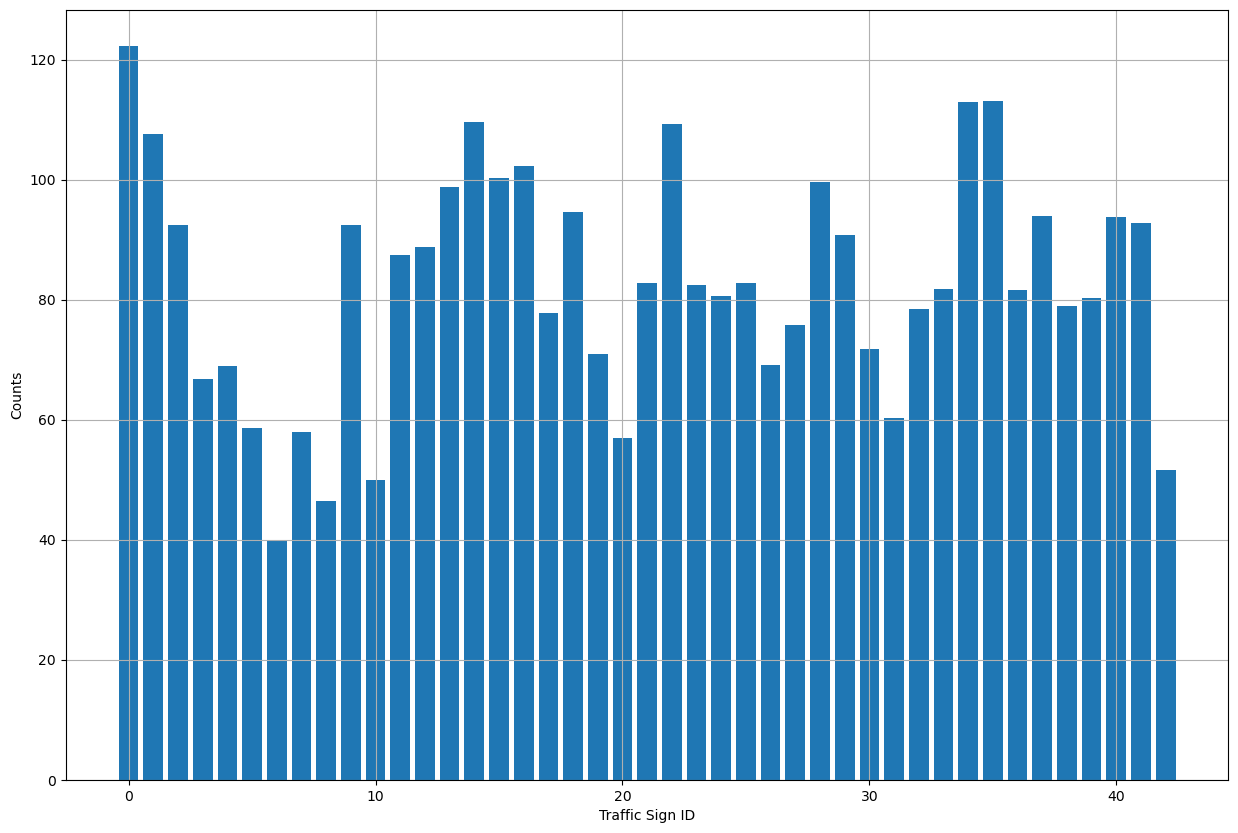

In [74]:
from collections import Counter

ids = data['ClassId']
count = Counter(ids)


x = np.arange(0, 44)
y = np.zeros(44)

#for classId in x:
#    print(classId)

    
for ii in range(num_samples):
#for ii in range(1000):
    #classId = data.iloc[ii]['ClassId']
    img = cv2.imread(os.path.join(root, data.iloc[ii]['Path']), cv2.IMREAD_GRAYSCALE)
    classIndex = data.iloc[ii]['ClassId']
    y[classIndex] += np.mean(img)
    
for clsId in x:
    y[clsId] = y[clsId] / count[clsId]
    
plt.bar(x, y), plt.grid(True)
plt.xlabel('Average brightness 0..255'), plt.ylabel('Classes')

In general brightness distribution not bad. But we have some dark classes. I think images have to be normalized before network training.

<h2>Thanks for viewing!</h2> ❤️️